<a href="https://colab.research.google.com/github/abd-ui/Makeen/blob/main/week%204/exerciseA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

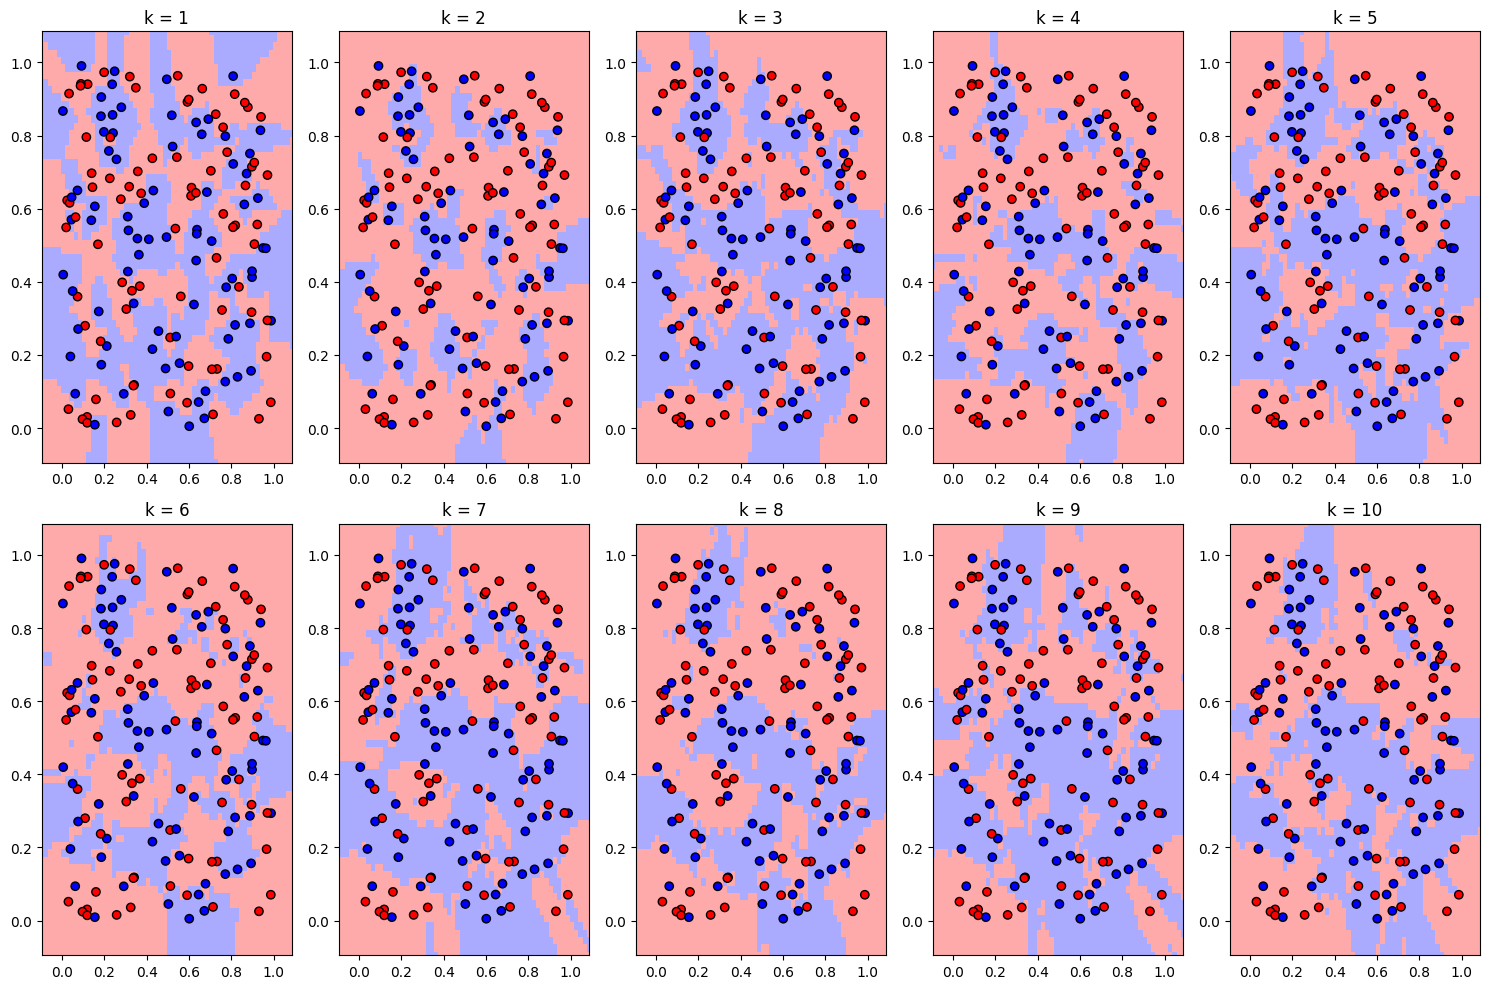

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set the seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 200

# Generate random values for x1 and x2
x1 = np.random.rand(num_points)
x2 = np.random.rand(num_points)

# Create the dataset by stacking x1 and x2 horizontally
dataset = np.column_stack((x1, x2))

# Generate random labels (0 or 1)
labels = np.random.randint(0, 2, num_points)

# Split the dataset into training and test sets
train_ratio = 0.8  # 80% for training, 20% for testing
train_set, test_set, train_labels, test_labels = train_test_split(dataset, labels, train_size=train_ratio)

# Define a range of k values to evaluate
k_values = range(1, 11)

# Create a color map for visualization
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Plot the decision boundaries for different k values
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_set, train_labels)

    # Create a meshgrid of points to visualize the decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = dataset[:, 0].min() - 0.1, dataset[:, 0].max() + 0.1
    y_min, y_max = dataset[:, 1].min() - 0.1, dataset[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.subplot(2, 5, i)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(train_set[:, 0], train_set[:, 1], c=train_labels, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'k = {k}')

plt.tight_layout()
plt.show()


**The resulting plot will display the decision boundaries for each value of k from 1 to 10, allowing you to visualize how the decision boundaries change as k increases.**